# Poisson Flow Generative Models


## Step 1: Set up the environment


Clone the PFGM repository with the below command

In [ ]:
!git clone https://github.com/Newbeeer/Poisson_flow.git

Cloning into 'Poisson_flow'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 637 (delta 17), reused 31 (delta 13), pack-reused 600
Receiving objects: 100% (637/637), 87.08 MiB | 13.23 MiB/s, done.
Resolving deltas: 100% (447/447), done.


Next, navigate into the repository

In [ ]:
import os
os.chdir("Poisson_flow")

Optionally, execute the below command to checkout the commit that this Colab notebook was tested with (to ensure everything works properly)

In [ ]:
!git reset --hard 254a9018ca267cf387d6a9381cbcfc4e54736174

HEAD is now at 254a901 disable loading data when saving images


Next, execute the below command to modify the `requirements.txt` file in order to work properly in Colab

In [ ]:
with open("requirements.txt", "r") as f:
  new_reqs = ''.join(f.readlines()[1:])
  new_reqs = new_reqs.replace("numpy==1.22.4", "numpy==1.21.6")
  new_reqs = new_reqs.replace("pandas==1.4.2", "pandas==1.3.5")
  new_reqs = new_reqs.replace("torch==1.12.1+cu116\ntorchvision==0.13.1+cu116\n", "")

with open("requirements.txt", "w") as f:
  f.write(new_reqs)

Now install the requirements with the below command

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 7.1 MB/s 
     |████████████████████████████████| 1.0 MB 47.8 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 3.1 MB 59.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 511.7 MB 4.1 kB/s 
     |████████████████████████████████| 4.2 MB 53.0 MB/s 
     |████████████████████████████████| 365 kB 71.0 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
  Created wheel for jax: filename=jax-0.3.16-py3-none-any.whl size=1197715 sha256=f4b6110ed5234c57cd1ae189d16051d650762ac92d79ddc1a599f1e362299f01
  Stored in directory: /root/.cache/pip/wheels/b9/0d/a2/2091279bf29b90a2211a271f6f006ef13a656211a9e69ba1e3
Successfully built jax
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.1.1
    Uni

### **At this point you will have to restart the runtime**

Once the runtime has been restarted, execute the below command to install the remaining requirements. Note that you will have to type in `y` and hit Enter when prompted with `Proceed (y/n)?`

In [ ]:
!pip install torch --pre --extra-index-url https://download.pytorch.org/whl/nightly/cu116
!pip install Ninja
!pip install gdown
!pip uninstall jax
!pip install jax==0.3.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 9.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: jax 0.3.16
Uninstalling jax-0.3.16:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/jax-0.3.16.dist-info/*
    /usr/local/lib/python3.7/dist-packages/jax/*
Proceed (y/n)? y
  Successfully uninstalled jax-0.3.16
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.7 MB/s 
  Created wheel for jax: filename=jax-0.3.22-py3-none-any.whl size=1273168 sha256=49479c854d0a7c35d6512a77301eb9912532e6615d9b0d453157f24396409f6f
  Stored in directory: /root/.cache/pip/whee

## Step 2: Generate images

**Make sure that you have restarted the runtime (*Runtime > Restart runtime*). You can start here if you ever need to restart the runtime after this**

Navigate into the PFGM directory

In [ ]:
import os
os.chdir("Poisson_flow")
rootdir = os.getcwd()  # Save root directory for later

Import `Image` for image display

In [ ]:
from IPython.display import Image

### CIFAR-10 (32 x 32)

If you have already downloaded the CIFAR-10 checkpoint, then you can jump down to **Generate images**

#### Download the model checkpoint

In [ ]:
os.makedirs("cifar10_ddpmpp/checkpoints")
os.chdir("cifar10_ddpmpp/checkpoints")

In [ ]:
!gdown 1XGFapa1TzYGekAhh7OUKLy4VVqCoBGVg

Downloading...
From: https://drive.google.com/uc?id=1XGFapa1TzYGekAhh7OUKLy4VVqCoBGVg
To: /content/Poisson_flow/cifar10_ddpmpp/checkpoints/checkpoint_500000.pth
100% 990M/990M [00:05<00:00, 175MB/s]


In [ ]:
os.chdir("../..")

#### Generate images

In [ ]:
!python3 main.py --config ./configs/poisson/cifar10_ddpmpp.py \
--mode eval \
--workdir cifar10_ddpmpp \
--config.eval.enable_sampling \
--config.eval.save_images \
--config.eval.batch_size 100



1 Physical GPUs, 1 Logical GPUs
--- sampling eps: 0.001
I1026 15:44:01.239629 139790419285888 resolver.py:106] Using /tmp/tfhub_modules to cache modules.
I1026 15:44:01.241180 139790419285888 resolver.py:416] Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/tfgan/eval/inception/1'.
I1026 15:44:04.254787 139790419285888 resolver.py:154] Downloaded https://tfhub.dev/tensorflow/tfgan/eval/inception/1, Total size: 273.09MB
I1026 15:44:04.255293 139790419285888 resolver.py:431] Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/tfgan/eval/inception/1'.
I1026 15:44:06.648920 139790419285888 run_lib.py:308] begin checkpoint: 8
cifar10_ddpmpp/checkpoints/checkpoint_400000.pth does not exist
cifar10_ddpmpp/checkpoints/checkpoint_450000.pth does not exist
loading from  cifar10_ddpmpp/checkpoints/checkpoint_500000.pth
I1026 15:44:07.607259 139790419285888 run_lib.py:454] sampling -- ckpt: 10, round: 0
nfe: 104


#### Display images

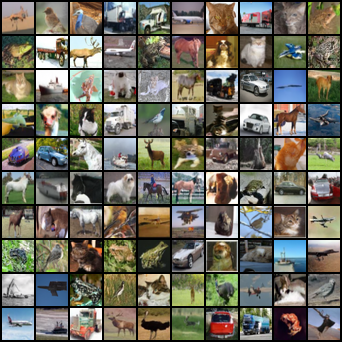

In [ ]:
Image('cifar10_ddpmpp/eval/ode_images_10.png')

### CelebA  (64 x 64)

If you have already downloaded the CelebA checkpoint, then you can jump down to **Generate images**

#### Download the model checkpoint

In [ ]:
os.makedirs("celeba64_ddpmpp/checkpoints")
os.chdir("celeba64_ddpmpp/checkpoints")

In [ ]:
!gdown 1LaT9ZihTinHdCMbKYVoplXgJ4MxyR-Yv

Downloading...
From: https://drive.google.com/uc?id=1LaT9ZihTinHdCMbKYVoplXgJ4MxyR-Yv
To: /content/Poisson_flow/celeba64_ddpmpp/checkpoints/checkpoint_550000.pth
100% 990M/990M [00:05<00:00, 177MB/s]


In [ ]:
os.chdir("../..")

#### Generate images

In [ ]:
!python3 main.py --config ./configs/poisson/celeba64_ddpmpp.py \
--mode eval \
--workdir celeba64_ddpmpp \
--config.eval.enable_sampling \
--config.eval.save_images \
--config.eval.batch_size 16



1 Physical GPUs, 1 Logical GPUs
--- sampling eps: 0.001
I1026 15:45:15.327880 140111491745664 resolver.py:106] Using /tmp/tfhub_modules to cache modules.
I1026 15:45:17.673780 140111491745664 run_lib.py:308] begin checkpoint: 5
celeba64_ddpmpp/checkpoints/checkpoint_250000.pth does not exist
celeba64_ddpmpp/checkpoints/checkpoint_300000.pth does not exist
celeba64_ddpmpp/checkpoints/checkpoint_350000.pth does not exist
celeba64_ddpmpp/checkpoints/checkpoint_400000.pth does not exist
celeba64_ddpmpp/checkpoints/checkpoint_450000.pth does not exist
celeba64_ddpmpp/checkpoints/checkpoint_500000.pth does not exist
loading from  celeba64_ddpmpp/checkpoints/checkpoint_550000.pth
I1026 15:45:18.624479 140111491745664 run_lib.py:454] sampling -- ckpt: 11, round: 0
nfe: 116


#### Display images

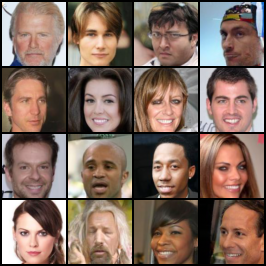

In [ ]:
Image('celeba64_ddpmpp/eval/ode_images_11.png')

### LSUN Bedroom (256 x 256)

If you have already downloaded the LSUN Bedroom checkpoint, then you can jump down to **Generate images**

#### Download the model checkpoint

In [ ]:
os.makedirs("bedroom_ddpmpp/checkpoints")
os.chdir("bedroom_ddpmpp/checkpoints")

In [ ]:
!gdown 1mwttvmNwaOP40fBqDK3VZNPt0x3AN6Rn

Downloading...
From: https://drive.google.com/uc?id=1mwttvmNwaOP40fBqDK3VZNPt0x3AN6Rn
To: /content/Poisson_flow/bedroom_ddpmpp/checkpoints/checkpoint_150000.pth
100% 1.99G/1.99G [00:15<00:00, 132MB/s]


In [ ]:
os.rename("checkpoint_150000.pth", "checkpoint_550000.pth")

In [ ]:
os.chdir("../..")

#### Generate images

In [ ]:
!python3 main.py --config ./configs/poisson/bedroom_ddpmpp.py \
--mode eval \
--workdir bedroom_ddpmpp \
--config.eval.enable_sampling \
--config.eval.save_images \
--config.eval.batch_size 1 \



1 Physical GPUs, 1 Logical GPUs
--- sampling eps: 0.001
I1026 15:47:47.875018 140226662832000 resolver.py:106] Using /tmp/tfhub_modules to cache modules.
I1026 15:47:49.846129 140226662832000 run_lib.py:308] begin checkpoint: 11
loading from  bedroom_ddpmpp/checkpoints/checkpoint_550000.pth
I1026 15:47:51.365966 140226662832000 run_lib.py:454] sampling -- ckpt: 11, round: 0
nfe: 128


#### Display images

In [ ]:
print(os.listdir("bedroom_ddpmpp/eval"))
#Image('bedroom_ddpmpp/eval/ode_images_11.png')

[]
